# Indian Startup Data Exploration

India is one of the fastest growing economy in the world. There are a lot of innovative startups coming up in the region and a lot of funding for these startups as well.

Wanted to know what type of startups are getting funded in the last few years?

Wanted to know who are the important investors? 

Wanted to know the hot fields that get a lot of funding these days?

Well, investors as well as startup founders have these questions in mind too. There are two main scenarios:

* Investors are forming a partnership with the startups they choose to invest in – if the company turns a profit, investors make returns proportionate to their amount of equity in the startup; if the startup fails, the investors lose the money they’ve invested. So, they want to know, which startup to invest in.

* Start-up companies often look to angel or investors to raise much-needed capital to get their business off the ground - but how does one value a brand new company?

This dataset is a chance to explore the Indian start up scene. Deep dive into funding data,derive insights to answer the above questions and also peek into the future of the market. 

We have been provided with data containing features like date, industry verticals, startup location,investment type,amount of investment,investor names etc.

Lets, start exploring and analyzing the data then!

## Importing Libraries

In [1]:
#conda install -c plotly plotly_express

In [2]:
import os
import string
import datetime
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
# import seaborn as sns
# color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly_express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999



In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

### Load the data

In [3]:
df = pd.read_csv('startup_data.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020,2020-01-01,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,NCR,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020,2020-01-01,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020,2020-01-01,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,NCR,Vinod Khatumal,Preseries A,"30,00,000",NaN,2020,2020-01-01,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",NaN,2020,2020-01-01,1800000.0


In [4]:
#df = df.drop(['Remarks','SubVertical','AmountInUSD'],1)

In [5]:
# df = df[df['SubVertical'].notna()]
# df = df[df['City'].notna()]
# df = df[df['IndustryVertical'].notna()]
# df = df[df['InvestorsName'].notna()]
# df = df[df['InvestmentType'].notna()]



In [6]:
print(df.shape)
print('*'*10)
print(df.isnull().sum())

(3044, 13)
**********
SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
City                 180
InvestorsName         24
InvestmentType         4
AmountInUSD          964
Remarks             2625
year                   0
yearmonth              0
CleanedAmount          0
dtype: int64


## Number Of Fundings


### Can we get an overview of the number of fundings that has changed over time?

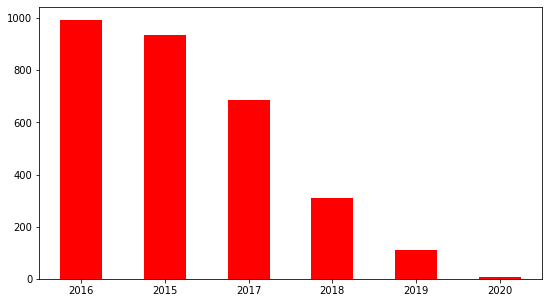

In [7]:
plt.figure(figsize=(9,5))
df['year'].value_counts().plot.bar(color='red',rot=0)
plt.show()

In [8]:
#plotting the trend using plotly
num_of_funding_rounds = df.year.value_counts().sort_index(ascending=True)
num_of_funding_rounds



2015    936
2016    993
2017    687
2018    310
2019    111
2020      7
Name: year, dtype: int64

In [9]:
fig = go.Figure(data= go.Bar(x=num_of_funding_rounds.index,
                             y=num_of_funding_rounds.values),
               layout_title_text='Number of funding per year',
)

fig.show()

### Lets try to see if the decrease in deals has any impact on amount being invested?

C:\Users\Abhineet\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning:

FixedFormatter should only be used together with FixedLocator



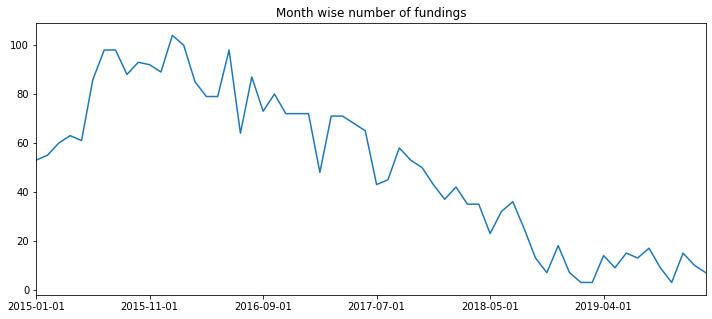

In [10]:
df.yearmonth.value_counts().sort_index().plot.line(figsize=(12,5))
plt.title('Month wise number of fundings')
plt.show()

C:\Users\Abhineet\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning:

FixedFormatter should only be used together with FixedLocator



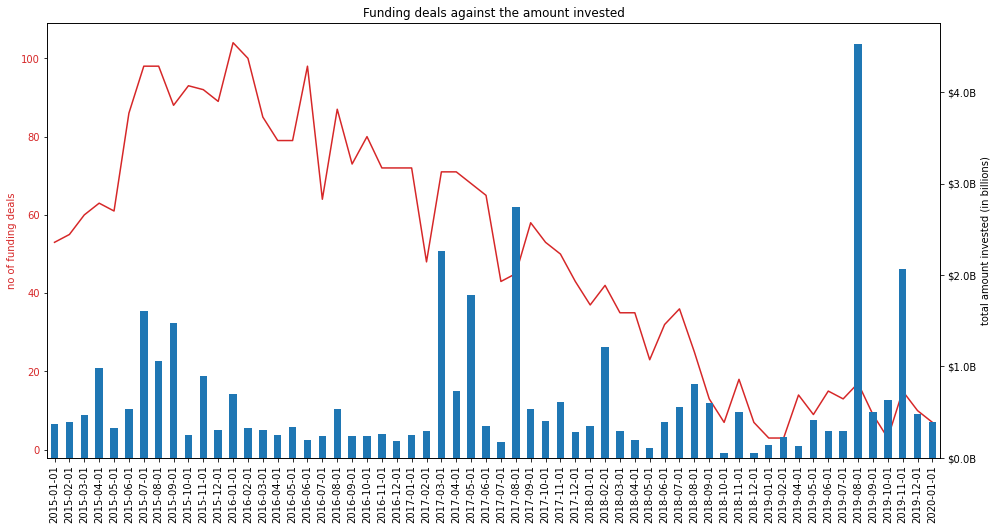

In [11]:
import matplotlib.ticker as ticker
ax1 = df.yearmonth.value_counts().sort_index().plot(figsize=(16,8),color='tab:red',rot=90)
ax1.tick_params(axis='y',labelcolor='tab:red')
ax1.set_ylabel('no of funding deals', color='tab:red')

ax2=ax1.twinx()

def billions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fB' % (x * 1e-9)
formatter_billions = ticker.FuncFormatter(billions)

formatter = ticker.StrMethodFormatter('${x:,.0f}')

ax2.yaxis.set_major_formatter(formatter_billions)

df.groupby('yearmonth').CleanedAmount.sum().plot.bar(ax=ax2)
ax2.set_ylabel('total amount invested (in billions)')
plt.title('Funding deals against the amount invested')
plt.show()


### top Startups by the investment amount 

In [12]:
df.loc[60,'CleanedAmount']


3900000000.0

In [13]:
df.loc[60,'CleanedAmount'] = 50e6
df.loc[60,'CleanedAmount']

50000000.0

In [14]:

df.iloc[df.CleanedAmount.nlargest(10).index]


,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
651,652,11/08/2017,Flipkart,E-Commerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,50,00,00,000",NaN,2017,2017-08-01,2.500000e+09
830,831,18/05/2017,Paytm,E-Commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,40,00,00,000",NaN,2017,2017-05-01,1.400000e+09
966,967,21/03/2017,Flipkart,E-Commerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,40,00,00,000",NaN,2017,2017-03-01,1.400000e+09
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,NCR,Vijay Shekhar Sharma,Funding Round,"1,00,00,00,000",NaN,2019,2019-11-01,1.000000e+09
2648,2649,28/07/2015,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,"70,00,00,000","Late Stage, 10th Round More here",2015,2015-07-01,7.000000e+08
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,NCR,"Alibaba Group, Ant Financial",Private Equity,"68,00,00,000",Late Stage (Alibaba @ 40% equity),2015,2015-09-01,6.800000e+08
188,189,30/08/2018,True North,Finance,Private Equity Firm,Mumbai,NaN,Private Equity,"60,00,00,000",NaN,2018,2018-08-01,6.000000e+08
33,34,02/10/2019,Udaan,B2B,Business development,Bangalore,"Altimeter Capital, DST Global",Series D,"58,50,00,000",NaN,2019,2019-10-01,5.850000e+08
2244,2245,18/11/2015,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,"50,00,00,000",Series F ( More Details Here),2015,2015-11-01,5.000000e+08
2470,2471,01/08/2015,Snapdeal,Ecommerce Marketplace,NaN,NCR,"Alibaba, Foxconn, Softbank",Private Equity,"50,00,00,000",Late Stage Round 7th (More details),2015,2015-08-01,5.000000e+08


In [15]:
amt_df = df.groupby('year').CleanedAmount.agg(['sum','mean'])
fig = go.Figure(data = go.Bar(x = amt_df.index,
                              y= amt_df['sum']),
                layout_title_text = 'Total investments by year')
fig.show()

In [16]:
fig = go.Figure(data = go.Bar(x = amt_df.index,
                              y= amt_df['mean']),
                layout_title_text = 'Total investments by year')
fig.show()

## Investment Type

Now let us explore the investment type of the funding deals like whether it is seed funding, private equity funding or so on.


### Can we get an idea about the number and value of funding deals with respect to the investment type?

In [17]:
top10_inv_type  = df.InvestmentType.value_counts()[:10]

fig = go.Figure(data = go.Bar(y = top10_inv_type.index[::-1],
                              x= top10_inv_type.values[::-1],
                              orientation='h'),
                layout_title_text = 'Top 10 Investment types')
fig.show()

In [18]:
top10_invstmntamnt = df.groupby('InvestmentType')['CleanedAmount'].agg(['size','sum','mean']).sort_values('size',ascending=False)[:10]

top10_invstmntamnt

,size,sum,mean
InvestmentType,,,
Seed Funding,1393,7.750756e+08,5.564074e+05
Private Equity,1357,2.672758e+10,1.969608e+07
Seed Angel Funding,141,2.256650e+08,1.600461e+06
Debt Funding,25,1.509194e+08,6.036774e+06
Series A,24,2.031980e+08,8.466583e+06
Series B,20,9.491957e+08,4.745979e+07
Series C,14,1.044718e+09,7.462274e+07
Series D,12,1.481799e+09,1.234832e+08
PreSeries A,8,4.137100e+07,5.171375e+06


In [19]:
fig = go.Figure(data=go.Bar(y = top10_invstmntamnt.index[::-1],
                            x = top10_invstmntamnt['sum'][::-1],
                            orientation='h'),
               layout_title_text = 'Top 10 Investment types against their amount')
fig.show()

In [20]:
fig = go.Figure(data=go.Bar(y = top10_invstmntamnt.index[::-1],
                            x = top10_invstmntamnt['mean'][::-1],
                            orientation='h'),
               layout_title_text = 'Top 10 Investment types against their amount')
fig.show()

## Location

### Find about the major start up hubs in India.

Now let us explore the location of the startups that got funded. This can help us to understand the startup hubs of India.

Since there are multiple locations in the data, let us plot the top 10 locations. We will also club New Delhi, Gurgaon & Noida together to form NCR for the below chart.

In [21]:
top10_cities = df.City.value_counts()[:10]
top10_cities

NCR          892
Bangalore    842
Mumbai       568
Pune         105
Hyderabad     99
Chennai       97
Ahmedabad     38
Jaipur        30
Kolkata       21
Indore        13
Name: City, dtype: int64

In [22]:
fig = go.Figure(data = go.Bar(y= top10_cities.index[::-1],
                              x= top10_cities.values[::-1],
                              orientation = 'h'),
               layout_title_text='Top 10 cities wrt to funding deals')
fig.show()

In [23]:
top10_cities_amt = df.groupby('City')['CleanedAmount'].agg(['size','sum','mean']).sort_values('size',ascending=False)[:10]
top10_cities_amt

,size,sum,mean
City,,,
NCR,892,8.461624e+09,9.486126e+06
Bangalore,842,1.464045e+10,1.738771e+07
Mumbai,568,4.940369e+09,8.697833e+06
Pune,105,6.330480e+08,6.029029e+06
Hyderabad,99,4.010493e+08,4.051003e+06
Chennai,97,7.187450e+08,7.409742e+06
Ahmedabad,38,1.136250e+08,2.990132e+06
Jaipur,30,1.527190e+08,5.090634e+06
Kolkata,21,1.597201e+07,7.605720e+05


In [24]:
fig = go.Figure(data = go.Bar(y= top10_cities_amt.sort_values('sum',ascending=True).index,
                              x= top10_cities_amt.sort_values('sum',ascending=True)['sum'],
                              orientation = 'h'),
               layout_title_text='Top 10 cities wrt to funding deals against the total amount invested')
fig.show()

In [25]:
fig = go.Figure(data = go.Bar(y= top10_cities_amt.sort_values('mean',ascending=True).index,
                              x= top10_cities_amt.sort_values('mean',ascending=True)['sum'],
                              orientation = 'h'),
               layout_title_text='Top 10 cities wrt to funding deals against the avg. amount invested')
fig.show()

In [26]:
temp_df = (df.groupby(['City','year'])
 .CleanedAmount.agg(['size','mean'])
 .reset_index()
 .sort_values('size',ascending=False)
)
temp_df = temp_df.loc[temp_df.City.isin(["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad", "Jaipur"])]
temp_df.head()

,City,year,size,mean
112,NCR,2016,324,4.600561e+06
10,Bangalore,2016,283,3.615824e+06
111,NCR,2015,254,1.094728e+07
11,Bangalore,2017,226,3.281654e+07
9,Bangalore,2015,200,1.483663e+07


In [27]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='City', 
                 color='City', 
                 size='size',
                 title='Number of funding deals by location over time')
fig.update_layout(showlegend=False)
fig.show()

In [28]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='City', 
                 color='City', 
                 size='mean',
                 title='Mean funding value by location over time')
fig.update_layout(showlegend=False)
fig.show()

## Industry Vertical

Let us now have a look at the industry verticals and the number of funding deals for each vertical.


### Can we get an overview of the Industry verticals and the number of funding deals?

In [29]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks', 'year',
       'yearmonth', 'CleanedAmount'],
      dtype='object')

In [30]:
df.IndustryVertical.nunique()

819

In [31]:
top10_industries = df.IndustryVertical.value_counts()[:10]
top10_industries

Consumer Internet    941
Technology           478
E-Commerce           276
Healthcare            70
Finance               62
Logistics             32
Education             24
Food & Beverage       23
Ed-Tech               14
E-commerce            12
Name: IndustryVertical, dtype: int64

In [32]:
fig = go.Figure(data = go.Bar(y= top10_industries.index[::-1],
                              x= top10_industries.values[::-1],
                              orientation = 'h'),
               layout_title_text='Top 10 industry verticals wrt to funding deals')
fig.show()

In [33]:
temp_df=(df.groupby(['IndustryVertical','year'])
 .CleanedAmount.agg(['size','mean'])
 .reset_index()
 .sort_values('size',ascending=False)
)
temp_df = temp_df.loc[temp_df.IndustryVertical.isin(top10_industries.index)]
temp_df.head()

,IndustryVertical,year,size,mean
115,Consumer Internet,2016,539,3.559446e+06
116,Consumer Internet,2017,309,8.399583e+06
776,Technology,2017,223,4.402860e+06
775,Technology,2016,190,3.591806e+06
176,E-Commerce,2016,163,5.956961e+06


In [34]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='IndustryVertical', 
                 color='IndustryVertical', 
                 size='size',
                 title='Number of funding deals by industry over time')
fig.update_layout(showlegend=False)
fig.show()

In [35]:
fig = px.scatter(temp_df, 
                 x='year', 
                 y='IndustryVertical', 
                 color='IndustryVertical', 
                 size='mean',
                 title='Mean funding value by industry over time')
fig.update_layout(showlegend=False)
fig.show()
